# 딥러닝 학습 방법 

## 손실 함수, 옵티마이저, 에포크의 개념 확인하기

### 1. 손실함수

손실 함수는 실제값과 예측값 차이를 수치화 해주는 함수. 회구에서는 평균 오차 제곱, 분류 문제에서는 크로스 엔트로피를 주로 손실 함수로 사용한다.


 #### MSE(Mean Squared Error, MSE)
 - 평균 오차 제곱. 연속형 변수를 예측할 때 사용.  
(딥 러닝 자연어 처리는 대부분 분류 문제이므로 크로스 엔트로피 함수를 주로 사용함.)

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mse'])

#### 크로스 엔트로피
- 이진 크로스 엔트로피 (Binary) - 이진 분류의 경우 binary cross-entropy를 사용함. 로지스틱 회귀에서 사용하던 손실 함수.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])  

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['acc'])

- 카테고리컬 크로스 엔트로피 (Categorical) - 출력층에 소프트 맥스 함수를 사용하는 다중 클래스 분류 일 경우 사용.

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

- 레이블에 대한 원-핫 인코딩을 생략하고, 정수값을 가진 레이블에 대해서 다중 클래스 분류를 수행할 경우 아래와 같이 실행

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

#### 그 외 손실 함수
https://www.tensorflow.org/api_docs/python/tf/keras/losses

## 옵티 마이저

### Batch-Size

손실 함수의 값을 줄여나가면서 학습하는 방법은 어떤 옵티마이저를 사용하느냐에 따라 달라집니다. 여기서 배치(Batch)라는 개념에 대한 이해가 필요합니다. 배치는 가중치 등의 매개 변수의 값을 조정하기 위해 사용하는 데이터의 양을 말합니다. 전체 데이터를 가지고 매개 변수의 값을 조정할 수도 있고, 정해준 양의 데이터만 가지고도 매개 변수의 값을 조정할 수 있습니다.

#### 1. 배치 경사 하강법
옵티마이저 중 하나로 오차를 구할 때 전체 데이터를 고려. 딥 러닝에서 한 번의 훈련 단위를 에포크라 하는데, 배치 경사 하강법에서 한 번의 에포크에 모든 매개변수 업데이를 단 한 번 수행함. 배치 경사 하강법은 모든 데이터를 고려해서 학습하므로 한 번의 매개변수 업데이트에 시간이 오래걸리며, 메모리를 크게 요구하는 단점이 있음.

model.fit(X_train, y_train, batch_size=len(X_train))

#### 2. 배치 크기가 1인 확률적 경사 하강법
매개변수 값 조정시 전체 데이터가 아닌 랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법. 더 적은 데이터를 사용하므로 속도는 빠름. 단, 매개변수의 변경폭이 불안정하고 정확도가 배치 경사 하강법보다 낮을 수 있음

model.fit(X_train, y_train, batch_size=1)

#### 3. 미니 배치 경사 하강법
배치 크기를 지정하여 데이터의 개수만큼에 대해서 계산하여 매개변수의 값을 조정하는 방법. 배치 경사 하강법 보다 빠르고 확률적 경사 하강법 보다는 정확도가 좋다는 점에서 가장 많이 사용되는 경사 하강법. 배치 크기는 일반적으로 2의 n제곱에 해당하는 숫자로 선택하는 것이 보편적. batch_size를 설정하지 않을 경우 기본인 32.

model.fit(X_train, y_train, batch_size=128)

### 옵티마이저

#### 1. 모멘텀
모멘텀(Momentum)은 관성이라는 물리학의 법칙을 응용한 방법입니다. 모멘텀 경사 하강법에 관성을 더 해줍니다. 모멘텀은 경사 하강법에서 계산된 접선의 기울기에 한 시점 전의 접선의 기울기값을 일정한 비율만큼 반영합니다. 이렇게 하면 마치 언덕에서 공이 내려올 때, 중간에 작은 웅덩이에 빠지더라도 관성의 힘으로 넘어서는 효과를 줄 수 있습니다.
  
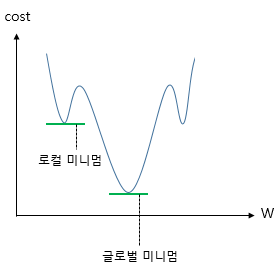
  

전체 함수에 걸쳐 최소값을 글로벌 미니멈(Global Minimum) 이라고 하고, 글로벌 미니멈이 아닌 특정 구역에서의 최소값인 로컬 미니멈(Local Minimum) 이라고 합니다. 로컬 미니멈에 도달하였을 때 글로벌 미니멈으로 잘못 인식하여 탈출하지 못하였을 상황에서 모멘텀. 즉, 관성의 힘을 빌리면 값이 조절되면서 현재의 로컬 미니멈에서 탈출하고 글로벌 미니멈 내지는 더 낮은 로컬 미니멈으로 갈 수 있는 효과를 얻을 수도 있습니다.

tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

#### 2. 아다그라드
매개변수들은 각자 의미하는 바가 다른데, 모든 매개변수에 동일한 학습률(learning rate)을 적용하는 것은 비효율적입니다. 아다그라드는 각 매개변수에 서로 다른 학습률을 적용시킵니다. 이때 변화가 많은 매개변수는 학습률이 작게 설정되고 변화가 적은 매개변수는 학습률을 높게 설정시킵니다.

tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)

#### 3. 알엠에스프롭
아다그라드는 학습을 계속 진행한 경우에는, 나중에 가서는 학습률이 지나치게 떨어진다는 단점이 있는데 이를 다른 수식으로 대체하여 이러한 단점을 개선하였습니다.

tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)

#### 4. 아담
아담은 알엠에스프롭과 모멘텀 두 가지를 합친 듯한 방법으로, 방향과 학습률 두 가지를 모두 잡기 위한 방법입니다.

tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

#### 사용 방법
-  상세 사용법 : https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

### 에포크, 배치 크기, 이터레이션 or 스탭
```
- 에포크 : 에포크란 인공 신경망에서 전체 데이터에 대해서 순전파와 역전파가 끝난 상태를 말합니다. 전체 데이터를 하나의 문제지에 비유한다면 문제지의 모든 문제를 끝까지 다 풀고, 정답지로 채점을 하여 문제지에 대한 공부를 한 번 끝낸 상태를 말합니다.

만약 에포크가 50이라고 하면, 전체 데이터 단위로는 총 50번 학습합니다. 문제지에 비유하면 문제지를 50번 푼 셈입니다. 이 에포크 횟수가 지나치거나 너무 적으면 앞서 배운 과적합과 과소적합이 발생할 수 있습니다.

- 배치 크기 : 배치 크기는 몇 개의 데이터 단위로 매개변수를 업데이트 하는지를 말합니다. 현실에 비유하면 문제지에서 몇 개씩 문제를 풀고나서 정답지를 확인하느냐의 문제입니다. 사람은 문제를 풀고 정답을 보는 순간 부족했던 점을 깨달으며 지식이 업데이트 된다고 하였습니다. 기계 입장에서는 실제값과 예측값으로부터 오차를 계산하고 옵티마이저가 매개변수를 업데이트합니다. 여기서 중요한 포인트는 업데이트가 시작되는 시점이 정답지/실제값을 확인하는 시점이라는 겁니다.

사람이 2,000 문제가 수록되어있는 문제지의 문제를 200개 단위로 풀고 채점한다고 하면 이때 배치 크기는 200입니다. 기계는 배치 크기가 200이면 200개의 샘플 단위로 가중치를 업데이트 합니다.

여기서 주의할 점은 배치 크기와 배치의 수는 다른 개념이라는 점입니다. 전체 데이터가 2,000일때 배치 크기를 200으로 준다면 배치의 수는 10입니다. 이는 에포크에서 배치 크기를 나눠준 값(2,000/200 = 10)이기도 합니다. 이때 배치의 수를 이터레이션이라고 합니다.

- 이터레이션 / 스탭 : 이터레이션이란 한 번의 에포크를 끝내기 위해서 필요한 배치의 수를 말합니다. 또는 한 번의 에포크 내에서 이루어지는 매개변수의 업데이트 횟수이기도 합니다. 전체 데이터가 2,000일 때 배치 크기를 200으로 한다면 이터레이션의 수는 총 10입니다. 이는 한 번의 에포크 당 매개변수 업데이트가 10번 이루어진다는 것을 의미합니다. 배치 크기가 1인 확률적 경사 하강법을 이 개념을 가지고 다시 설명하면 배치 크기가 1이므로 모든 이터레이션마다 하나의 데이터를 선택하여 경사 하강법을 수행합니다. 이터레이션은 스텝(Step)이라고 부르기도 함.
```